<a href="https://colab.research.google.com/github/maxashoka3/EDA-Global-Terrorism-Dataset/blob/main/EDA_Global_Terrorism_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 



##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Ashokanand Chaudhary**


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

#### **Define Your Business Objective?**

Answer Here.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import statistics
from statistics import mode

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Load Dataset
dataset = pd.read_csv("/content/drive/MyDrive/AlmaBetter/EDA - Global Terrorism Data/Global Terrorism Data.csv",encoding='ISO-8859-1')

### Dataset First View

In [ ]:
# Dataset First Look
dataset.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
dataset.shape

(181691, 135)

Since there are total of 135 columns in the data
Renaming some columns which we are going to use for analysis

### Selecting & Renaming required columns

In [ ]:
# Renaming the important columns
dataset = dataset.rename(columns = {'iyear':'Year',
                                    'imonth':'Month',
                                    'iday':'Day',
                                    'country_txt':'Country',
                                    'region_txt':'Region',
                                    'provstate':'State',
                                    'city':'City',
                                    'attacktype1_txt':'Attack_type',
                                    'targtype1_txt':'Target_type',
                                    'targsubtype1_txt':'Target_subtype',
                                    'gname':'Gang_name',
                                    'weaptype1_txt':'Weapon_type'})


In [ ]:
# Checking columns whether they are updated or not
dataset.head()

,eventid,Year,Month,Day,approxdate,extended,resolution,country,Country,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [ ]:
# Selecting only important column which will be used for the analysis
terror_df = dataset[['Year','Month','Day','Country','Region','State','City',
                      'Attack_type','Target_type','Target_subtype','Gang_name','Weapon_type']]

In [ ]:
# Now checking the new dataset
terror_df.head()

,Year,Month,Day,Country,Region,State,City,Attack_type,Target_type,Target_subtype,Gang_name,Weapon_type
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,Assassination,Private Citizens & Property,Named Civilian,MANO-D,Unknown
1,1970,0,0,Mexico,North America,Federal,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",23rd of September Communist League,Unknown
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Unknown,Unknown
3,1970,1,0,Greece,Western Europe,Attica,Athens,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,Unknown,Explosives
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,Unknown,Incendiary


In [ ]:
# checking its shape
terror_df.shape

(181691, 12)

There are 135 column in the dataset, But we required only 12 columns in the data so created the new dataset named ***terror_df*** and selected only 12 column in the new dataset.

### Dataset Information

In [ ]:
# Dataset Info
terror_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Year            181691 non-null  int64 
 1   Month           181691 non-null  int64 
 2   Day             181691 non-null  int64 
 3   Country         181691 non-null  object
 4   Region          181691 non-null  object
 5   State           181270 non-null  object
 6   City            181257 non-null  object
 7   Attack_type     181691 non-null  object
 8   Target_type     181691 non-null  object
 9   Target_subtype  171318 non-null  object
 10  Gang_name       181691 non-null  object
 11  Weapon_type     181691 non-null  object
dtypes: int64(3), object(9)
memory usage: 16.6+ MB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count 181691
terror_df.duplicated().value_counts()

False    165558
True      16133
dtype: int64

We can clearly see that there are **16133** number of duplicate rows.Though it is the huge number we need to remove because Duplicate rows causes the error and has no use in the EDA

In [ ]:
# Removing the duplicate rows
terror_df.drop_duplicates(inplace = True)

In [ ]:
# Checking if dataset updated or not
terror_df.duplicated().value_counts()

False    165558
dtype: int64

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
print(terror_df.isnull().sum())

Year                 0
Month                0
Day                  0
Country              0
Region               0
State              421
City               420
Attack_type          0
Target_type          0
Target_subtype    9123
Gang_name            0
Weapon_type          0
dtype: int64


Year                 0
Month                0
Day                  0
Country              0
Region               0
State              421
City               420
Attack_type          0
Target_type          0
Target_subtype    9123
Gang_name            0
Weapon_type          0
dtype: int64


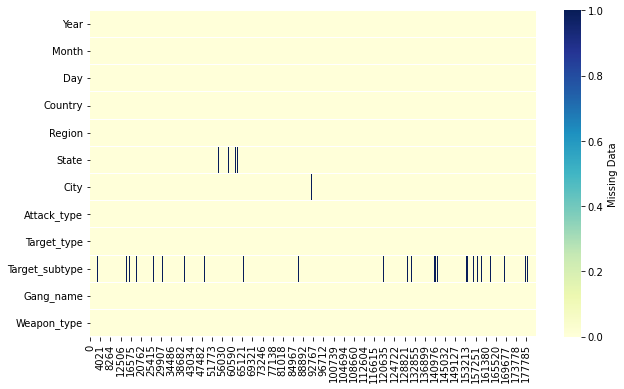

In [ ]:
# Visualizing the missing values
print(terror_df.isnull().sum())
plt.figure(figsize=(10,6))
sns.heatmap(terror_df.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})

Heatmap shows it contains null values and these null values will be removed later..


### What did you know about your dataset?

This is The Global Terrorism dataset from which is needed to analyse and explore the possible causes, trends and patterns in the act of terrorism.
In this dataset it has 181691 rows and  135 columns But we selected the important columns and all rows to perform the Exploratory Data Analysis. There are 16133 duplicate rows in the dataset which has been removed from the dataset. Its three columns has null values.They are :
* State
* City
* Target_subtype
 
 

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
terror_df.columns.tolist()

['Year',
 'Month',
 'Day',
 'Country',
 'Region',
 'State',
 'City',
 'Attack_type',
 'Target_type',
 'Target_subtype',
 'Gang_name',
 'Weapon_type']

In [ ]:
# Dataset Describe
terror_df.describe(include = 'all')

,Year,Month,Day,Country,Region,State,City,Attack_type,Target_type,Target_subtype,Gang_name,Weapon_type
count,165558.000000,165558.00000,165558.000000,165558,165558,165137,165138,165558,165558,156435,165558,165558
unique,NaN,NaN,NaN,205,12,2855,36674,9,22,112,3537,12
top,NaN,NaN,NaN,Iraq,Middle East & North Africa,Baghdad,Unknown,Bombing/Explosion,Private Citizens & Property,Police Security Forces/Officers,Unknown,Explosives
freq,NaN,NaN,NaN,21551,45885,6436,7941,77558,39316,10594,76711,81660
mean,2003.001504,6.46844,15.524795,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,13.182221,3.39002,8.817797,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1970.000000,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1991.000000,4.00000,8.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2009.000000,6.00000,15.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2014.000000,9.00000,23.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Variables Description 

Answer Here

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
column_list = terror_df.columns.tolist()
for i in column_list:
  print("\033[1m" + i + "\033[0m")  
  print("Unique values are: \n ",terror_df[i].unique().tolist())
  print("No. of unique values : ", terror_df[i].nunique(),".\n")
  

Year
Unique values are: 
  [1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1986, 1982, 1983, 1984, 1985, 1987, 1988, 1989, 1990, 1991, 1992, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
No. of unique values :  47 .

Month
Unique values are: 
  [7, 0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12]
No. of unique values :  13 .

Day
Unique values are: 
  [2, 0, 1, 3, 6, 8, 9, 10, 11, 12, 13, 14, 15, 19, 20, 21, 22, 25, 26, 27, 28, 30, 31, 4, 7, 16, 17, 18, 23, 24, 5, 29]
No. of unique values :  32 .

Country
Unique values are: 
  ['Dominican Republic', 'Mexico', 'Philippines', 'Greece', 'Japan', 'United States', 'Uruguay', 'Italy', 'East Germany (GDR)', 'Ethiopia', 'Guatemala', 'Venezuela', 'West Germany (FRG)', 'Switzerland', 'Jordan', 'Spain', 'Brazil', 'Egypt', 'Argentina', 'Lebanon', 'Ireland', 'Turkey', 'Paraguay', 'Iran', 'United Kingdom', 'Colombia', 'Bolivia', 'Nicaragu

Its value has lots of problem which needed to be fixed in the Data Wrangling part

## 3. ***Data Wrangling***

#### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
# creating the copy of the current datast 
df = terror_df.copy()


##### Handling null values

In [ ]:
# Handling the null values and the unknown values

print(df.isnull().sum())


Year                 0
Month                0
Day                  0
Country              0
Region               0
State              421
City               420
Attack_type          0
Target_type          0
Target_subtype    9123
Gang_name            0
Weapon_type          0
dtype: int64


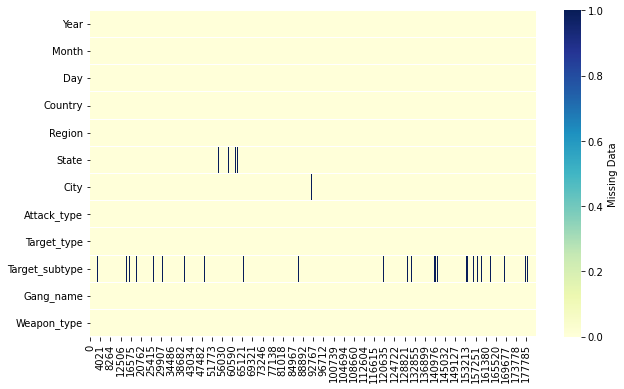

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(10,6))
sns.heatmap(
    df.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})

Heatmap shows null values and these are clearly the sensetive values so droping wont be solution. So null values are handled separetly.
* State
* City
* Target_subtype

In [ ]:
# filling null values of city and State as Unknown
df['City'] = df['City'].fillna('Unknown')
df['State'] = df['State'].fillna('Unknown')

In [ ]:
# filling null values of Target_subtype as Others
df['Target_subtype'] = df['Target_subtype'].fillna('Others')

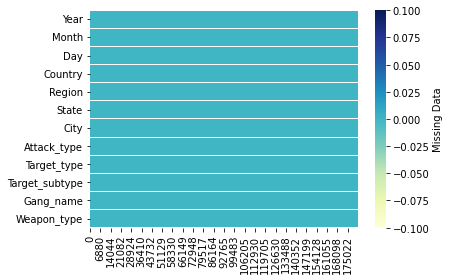

In [ ]:
# Visualizing the missing values if any thorugh Heatmap
sns.heatmap(df.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})

The above Heatmap show absence of null values.

In [ ]:
####

##### Naming properly

In [ ]:
# Function to check column properly
def column_check(column):  
  print(column)  
  print("Unique values are: \n ", df[column].unique().tolist())
  print("No. of unique values : ", df[column].nunique(),".\n")
  


In [ ]:
column_check('Year')

Year
Unique values are: 
  [1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1986, 1982, 1983, 1984, 1985, 1987, 1988, 1989, 1990, 1991, 1992, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
No. of unique values :  47 .



In [ ]:
column_check('Month')

Month
Unique values are: 
  [7, 0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12]
No. of unique values :  13 .



In [ ]:
#checking the total values with month equals to 0
print(len(df[df['Month'] == 0]))

19


In [ ]:
# Replacing the 0 with mode value in the month because it may have some significance in that month
df.loc[df['Month'] == 0,'Month']= mode(df['Month'])


In [ ]:
#checking whether it is updated or not
column_check('Month')

Month
Unique values are: 
  [7, 5, 1, 2, 3, 4, 6, 8, 9, 10, 11, 12]
No. of unique values :  12 .



In [ ]:
# Checking the unique values of the column Day
column_check("Day")

Day
Unique values are: 
  [2, 0, 1, 3, 6, 8, 9, 10, 11, 12, 13, 14, 15, 19, 20, 21, 22, 25, 26, 27, 28, 30, 31, 4, 7, 16, 17, 18, 23, 24, 5, 29]
No. of unique values :  32 .



In [ ]:
# Checking the length of day equals to the zero
print(len(df[df['Day'] == 0]))

786


We do not have **O** in number in the day, So we will be removing that **Day O** with mode 

In [ ]:
# Replacing 0 value with most frequent number
df.loc[df['Day']==0,'Day'] = mode(df['Day'])

In [ ]:
# Checking if its updated or not
column_check("Day")

Day
Unique values are: 
  [2, 15, 1, 3, 6, 8, 9, 10, 11, 12, 13, 14, 19, 20, 21, 22, 25, 26, 27, 28, 30, 31, 4, 7, 16, 17, 18, 23, 24, 5, 29]
No. of unique values :  31 .



In [ ]:
# Checking the unique values of the column Country
column_check("Country")

Country
Unique values are: 
  ['Dominican Republic', 'Mexico', 'Philippines', 'Greece', 'Japan', 'United States', 'Uruguay', 'Italy', 'East Germany (GDR)', 'Ethiopia', 'Guatemala', 'Venezuela', 'West Germany (FRG)', 'Switzerland', 'Jordan', 'Spain', 'Brazil', 'Egypt', 'Argentina', 'Lebanon', 'Ireland', 'Turkey', 'Paraguay', 'Iran', 'United Kingdom', 'Colombia', 'Bolivia', 'Nicaragua', 'Netherlands', 'Belgium', 'Canada', 'Australia', 'Pakistan', 'Zambia', 'Sweden', 'Costa Rica', 'South Yemen', 'Cambodia', 'Israel', 'Poland', 'Taiwan', 'Panama', 'Kuwait', 'West Bank and Gaza Strip', 'Austria', 'Czechoslovakia', 'India', 'France', 'South Vietnam', 'Brunei', 'Zaire', "People's Republic of the Congo", 'Portugal', 'Algeria', 'El Salvador', 'Thailand', 'Haiti', 'Sudan', 'Morocco', 'Cyprus', 'Myanmar', 'Afghanistan', 'Peru', 'Chile', 'Honduras', 'Yugoslavia', 'Ecuador', 'New Zealand', 'Malaysia', 'Singapore', 'Botswana', 'Jamaica', 'Chad', 'North Yemen', 'Andorra', 'Syria', 'South Korea', 'Uni

We can see there are many country which have been partition and captured by other like Soviet Union, East Germany & West Germany, west bank and Gaza Strip and soon. So we will not do any thing to these but There is no country as the International so we will take look at this.

In [ ]:
#checking the country International
df[df['Country']=='International']

,Year,Month,Day,Country,Region,State,City,Attack_type,Target_type,Target_subtype,Gang_name,Weapon_type
74658,2002,10,6,International,Middle East & North Africa,Gulf of Aden,Gulf of Aden,Bombing/Explosion,Maritime,Oil Tanker,Al-Qaida,Explosives


We will rename International to Gulf of Aden.


In [ ]:
# Renaming International to the Gulf of Aden
df.loc[df['Country']=='International','Country'] = 'Gulf of Aden'

In [ ]:
# Checking if its updated or not
df[df['Country']=='Gulf of Aden']

,Year,Month,Day,Country,Region,State,City,Attack_type,Target_type,Target_subtype,Gang_name,Weapon_type
74658,2002,10,6,Gulf of Aden,Middle East & North Africa,Gulf of Aden,Gulf of Aden,Bombing/Explosion,Maritime,Oil Tanker,Al-Qaida,Explosives


In [ ]:
column_check('Region')

Region
Unique values are: 
  ['Central America & Caribbean', 'North America', 'Southeast Asia', 'Western Europe', 'East Asia', 'South America', 'Eastern Europe', 'Sub-Saharan Africa', 'Middle East & North Africa', 'Australasia & Oceania', 'South Asia', 'Central Asia']
No. of unique values :  12 .



In [ ]:
# Checking the unique values of State
column_check('State')

State
Unique values are: 
  ['Unknown', 'Federal', 'Tarlac', 'Attica', 'Fukouka', 'Illinois', 'Montevideo', 'California', 'Wisconsin', 'Colorado', 'Lazio', 'Michigan', 'Puerto Rico', 'Berlin', 'New York', 'Washington', 'New Jersey', 'Guatemala', 'Metropolitan Manila', 'Caracas', 'Nebraska', 'Mississippi', 'Ohio', 'Florida', 'Oregon', 'Massachusetts', 'Bavaria', 'Maryland', 'Louisiana', 'Connecticut', 'Hesse', 'Zurich', 'Arizona', 'Khalil', 'Metropolitian Manila', 'Alabama', 'New Mexico', 'Sao Paulo', 'Alexandria', 'Montana', 'District of Columbia', 'Pampanga', 'National', 'Corrientes', 'Buenos Aires', 'Beirut', 'Georgia', 'Texas', 'Dublin', 'Rio Grande do Sul', 'Kansas', 'Missouri', 'Amman', 'Istanbul', 'Pennsylvania', 'Minnesota', 'Iowa', 'Indiana', 'Asuncion', 'North Carolina', 'Oklahoma', 'Idaho', 'Geneva', 'Utah', 'Capiz', 'Lara', 'Tehran', 'Rio de Janeiro', 'Northern Ireland', 'Caldas', 'Managua', 'Pernambuco', 'Navarre', 'North Holland', 'Brussels', 'Tucuman', 'Santa Fe', 'Ankara

In [ ]:
# Checking values of the city
column_check('City')

City
Unique values are: 
  ['Santo Domingo', 'Mexico city', 'Unknown', 'Athens', 'Fukouka', 'Cairo', 'Montevideo', 'Oakland', 'Madison', 'Baraboo', 'Denver', 'Rome', 'Detroit', 'Rio Piedras', 'Berlin', 'New York City', 'Rio Grande', 'Seattle', 'Champaign', 'Jersey City', 'Guatemala City', 'Quezon City', 'Caracas', 'South Sioux City', 'West Point', 'Norwalk', 'Coral Gables', 'Bamban', 'Portland', 'Akron', 'Dorado', 'Carolina', 'Boston', 'Whitewater', 'Batavia', 'Munich', 'Ypsilanti', 'Berkeley', 'Eugene', 'San Francisco', 'Buckeystown', 'Covington', 'Cleveland', 'Vallejo', 'Hartford', 'Frankfurt', 'Zurich', 'Ithaca', 'Prairie du Sac', 'Tucson', 'Boulder', 'Hebron', 'Manila', 'Colorado Springs', 'Martinez', 'San Juan', 'Ashville', 'Bridgeport', 'Albuquerque', 'Bel Air', 'Cambridge', 'Sao Paulo', 'Chicago', 'Appleton', 'Alexandria', 'Long Beach', 'Billings', 'San Bernardino', 'Los Angeles', 'Lockland', 'Washington', 'Orlando', 'Angeles', 'Ituzaingo', 'Richmond', 'Buenos Aires', 'Beirut', 

In [ ]:
column_check('Attack_type')

Attack_type
Unique values are: 
  ['Assassination', 'Hostage Taking (Kidnapping)', 'Bombing/Explosion', 'Facility/Infrastructure Attack', 'Armed Assault', 'Hijacking', 'Unknown', 'Unarmed Assault', 'Hostage Taking (Barricade Incident)']
No. of unique values :  9 .



Lets try to use the simple name and small name

In [ ]:
# Changing the Hostage Taking(Kidnapping) to the Kidnapping and 'Hostage Taking (Barricade Incident)' to the Barricade Incident
df.loc[df['Attack_type'] == 'Hostage Taking (Kidnapping)','Attack_type'] = 'Kidnapping'
df.loc[df['Attack_type'] == 'Hostage Taking (Barricade Incident)','Attack_type'] = 'Barricade Incident'

In [ ]:
# checking if its updated or not
df[df['Attack_type'] == 'Barricade Incident']

,Year,Month,Day,Country,Region,State,City,Attack_type,Target_type,Target_subtype,Gang_name,Weapon_type
336,1970,6,9,Jordan,Middle East & North Africa,Amman,Amman,Barricade Incident,Business,Hotel/Resort,Popular Front for the Liberation of Palestine ...,Firearms
469,1970,8,21,Uruguay,South America,Montevideo,Montevideo,Barricade Incident,Telecommunication,Radio,Tupamaros (Uruguay),Firearms
941,1971,7,21,United States,North America,California,San Francisco,Barricade Incident,Business,Bank/Commerce,Black Liberation Army,Firearms
1211,1972,3,16,United States,North America,New York,New York City,Barricade Incident,Business,Bank/Commerce,Black Liberation Army,Firearms
1570,1972,9,29,United States,North America,New York,New York City,Barricade Incident,Business,Bank/Commerce,Black Liberation Army,Firearms
...,...,...,...,...,...,...,...,...,...,...,...,...
180703,2017,11,23,Nigeria,Sub-Saharan Africa,Adamawa,Sabon Gari,Barricade Incident,Private Citizens & Property,Farmer,Boko Haram,Firearms
181239,2017,12,11,India,South Asia,Jharkhand,Madhuamilan,Barricade Incident,Business,Construction,People's Liberation Front of India,Firearms
181383,2017,12,18,Venezuela,South America,Miranda,San Antonio de los Altos,Barricade Incident,Military,Military Barracks/Base/Headquarters/Checkpost,Unknown,Firearms
181615,2017,12,28,India,South Asia,Jharkhand,Pandrasali,Barricade Incident,Business,Construction,Unknown,Firearms


In [ ]:
df[df['Attack_type'] == 'Kidnapping']

,Year,Month,Day,Country,Region,State,City,Attack_type,Target_type,Target_subtype,Gang_name,Weapon_type
1,1970,5,15,Mexico,North America,Federal,Mexico city,Kidnapping,Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",23rd of September Communist League,Unknown
27,1970,1,22,Venezuela,South America,Caracas,Caracas,Kidnapping,Business,Retail/Grocery/Bakery,Armed Forces of National Liberation- Venezuela...,Unknown
103,1970,3,3,Spain,Western Europe,Unknown,Unknown,Kidnapping,Government (General),Politician or Political Party Movement/Meeting...,1st of May Group,Unknown
112,1970,3,6,Guatemala,Central America & Caribbean,Guatemala,Guatemala City,Kidnapping,Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",Rebel Armed Forces of Guatemala (FAR),Firearms
123,1970,3,11,Brazil,South America,Sao Paulo,Sao Paulo,Kidnapping,Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",Popular Revolutionary Vanguard (VPR),Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...
181616,2017,12,28,Yemen,Middle East & North Africa,Al Hudaydah,Bayt al-Faqiah district,Kidnapping,Private Citizens & Property,Alleged Informant,Houthi extremists (Ansar Allah),Unknown
181620,2017,12,28,Afghanistan,South Asia,Wardak,Pul-e-Sukh,Kidnapping,Educational Institution,Teacher/Professor/Instructor,Unknown,Firearms
181630,2017,12,28,Philippines,Southeast Asia,North Cotabato,Tuael,Kidnapping,Police,Police Security Forces/Officers,New People's Army (NPA),Firearms
181636,2017,12,29,Afghanistan,South Asia,Jawzjan,Darzab district,Kidnapping,Religious Figures/Institutions,Religious Figure,Khorasan Chapter of the Islamic State,Unknown


In [ ]:
# Checking the unique values of the Target_type
column_check('Target_type')

Target_type
Unique values are: 
  ['Private Citizens & Property', 'Government (Diplomatic)', 'Journalists & Media', 'Police', 'Utilities', 'Military', 'Government (General)', 'Airports & Aircraft', 'Business', 'Educational Institution', 'Violent Political Party', 'Religious Figures/Institutions', 'Unknown', 'Transportation', 'Tourists', 'NGO', 'Telecommunication', 'Food or Water Supply', 'Terrorists/Non-State Militia', 'Other', 'Maritime', 'Abortion Related']
No. of unique values :  22 .



In [ ]:
#checking the Target_subtype values
column_check('Target_subtype')

Target_subtype
Unique values are: 
  ['Named Civilian', 'Diplomatic Personnel (outside of embassy, consulate)', 'Radio Journalist/Staff/Facility', 'Embassy/Consulate', 'Police Building (headquarters, station, school)', 'Police Security Forces/Officers', 'Electricity', 'Military Recruiting Station/Academy', 'Government Building/Facility/Office', 'Military Barracks/Base/Headquarters/Checkpost', 'Aircraft (not at an airport)', 'Retail/Grocery/Bakery', 'Others', 'Military Personnel (soldiers, troops, officers, forces)', 'School/University/Educational Building', 'Multinational Corporation', 'Party Office/Facility', 'House/Apartment/Residence', 'Race/Ethnicity Identified', 'Judge/Attorney/Court', 'Police Patrol (including vehicles and convoys)', 'Place of Worship', 'Vehicles/Transportation', 'Bus (excluding tourists)', 'Politician or Political Party Movement/Meeting/Rally', 'Hotel/Resort', 'Airport', 'Bank/Commerce', 'Construction', 'Tour Bus/Van', 'Train/Train Tracks/Trolley', 'Religion Ide

In [ ]:
column_check('Gang_name')

Gang_name
Unique values are: 
  ['MANO-D', '23rd of September Communist League', 'Unknown', 'Black Nationalists', 'Tupamaros (Uruguay)', "New Year's Gang", 'Weather Underground, Weathermen', 'Left-Wing Militants', 'Armed Commandos of Liberation', 'Commune 1', 'Eritrean Liberation Front', 'Strikers', 'Student Radicals', 'White extremists', 'Armed Forces of National Liberation- Venezuela (FALN)', "New People's Army (NPA)", 'Armed Revolutionary Independence Movement (MIRA)', 'Popular Front for the Liberation of Palestine (PFLP)', 'Popular Front for the Liberation of Palestine, Gen Cmd (PFLP-GC)', '1st of May Group', 'Rebel Armed Forces of Guatemala (FAR)', 'Ku Klux Klan', 'Popular Revolutionary Vanguard (VPR)', 'Revolutionary Force 9', 'Puerto Rican Nationalists', 'Chicano Liberation Front', 'Puerto Rican Resistance Movement', 'Black Panthers', 'Dominican Popular Movement (MPD)', 'Argentine Liberation Front (FAL)', 'Argentine National Organization Movement (MANO)', 'Japanese Red Army (JRA

In [ ]:
column_check('Weapon_type')

Weapon_type
Unique values are: 
  ['Unknown', 'Explosives', 'Incendiary', 'Firearms', 'Chemical', 'Melee', 'Sabotage Equipment', 'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)', 'Fake Weapons', 'Radiological', 'Other', 'Biological']
No. of unique values :  12 .



Here in Weapon_type its one of the unique value is : 
**Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)'** it is too lengthly so this value is changed to Vehicle and also changing the Unknown to the Other

In [ ]:
# Changing big name to Vehicle
df.replace( {"Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)": "Vehicle"},inplace = True)

In [ ]:
# Changing the 'Unknown' to the 'Other
df.loc[df['Weapon_type'] == 'Unknown','Weapon_type'] = 'Other'

In [ ]:
# Checking if its updated or not
df['Weapon_type'].unique()

array(['Other', 'Explosives', 'Incendiary', 'Firearms', 'Chemical',
       'Melee', 'Sabotage Equipment', 'Vehicle', 'Fake Weapons',
       'Radiological', 'Biological'], dtype=object)

In [ ]:
terror_df.head()


,Year,Month,Day,Country,Region,State,City,Attack_type,Target_type,Target_subtype,Gang_name,Weapon_type
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,Assassination,Private Citizens & Property,Named Civilian,MANO-D,Unknown
1,1970,0,0,Mexico,North America,Federal,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",23rd of September Communist League,Unknown
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Unknown,Unknown
3,1970,1,0,Greece,Western Europe,Attica,Athens,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,Unknown,Explosives
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,Unknown,Incendiary


In [ ]:
# Check again
df.head()

,Year,Month,Day,Country,Region,State,City,Attack_type,Target_type,Target_subtype,Gang_name,Weapon_type
0,1970,7,2,Dominican Republic,Central America & Caribbean,Unknown,Santo Domingo,Assassination,Private Citizens & Property,Named Civilian,MANO-D,Other
1,1970,5,15,Mexico,North America,Federal,Mexico city,Kidnapping,Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",23rd of September Communist League,Other
2,1970,1,15,Philippines,Southeast Asia,Tarlac,Unknown,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Unknown,Other
3,1970,1,15,Greece,Western Europe,Attica,Athens,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,Unknown,Explosives
4,1970,1,15,Japan,East Asia,Fukouka,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,Unknown,Incendiary


##### Exploring the Hospot of Terrorism

In [ ]:
# Top 10 Country with most number of Terrorism
df['Country'].value_counts()[:10]

Iraq              21551
Pakistan          13375
Afghanistan       12258
India             11372
Colombia           7282
Philippines        6679
United Kingdom     4830
Peru               4778
El Salvador        4130
Somalia            4016
Name: Country, dtype: int64

In [ ]:
# Bottom 10 Country with less number of Terrorism
df['Country'].value_counts().tail(10)

Falkland Islands       1
Vatican City           1
St. Lucia              1
New Hebrides           1
Antigua and Barbuda    1
Gulf of Aden           1
South Vietnam          1
Andorra                1
North Korea            1
Wallis and Futuna      1
Name: Country, dtype: int64

In [ ]:
# Lets explore top 10 country 
Iraq = df[df['Country'] == 'Iraq'].reset_index(drop = True)


In [ ]:
Iraq.head()

,Year,Month,Day,Country,Region,State,City,Attack_type,Target_type,Target_subtype,Gang_name,Weapon_type
0,1975,3,1,Iraq,Middle East & North Africa,Nineveh,Mosul,Hijacking,Airports & Aircraft,Aircraft (not at an airport),Unknown,Other
1,1976,12,15,Iraq,Middle East & North Africa,Baghdad,Baghdad,Bombing/Explosion,Airports & Aircraft,Airport,Unknown,Explosives
2,1976,12,18,Iraq,Middle East & North Africa,Unknown,Penjwon,Kidnapping,Government (General),"Government Personnel (excluding police, military)",Kurdish Democratic Party-Iraq (KDP),Other
3,1976,12,24,Iraq,Middle East & North Africa,Baghdad,Baghdad,Assassination,Violent Political Party,Party Official/Candidate/Other Personnel,Unknown,Firearms
4,1979,6,15,Iraq,Middle East & North Africa,Basra,Basra,Assassination,Government (General),Politician or Political Party Movement/Meeting...,Unknown,Other


In [ ]:
Year.value_count()

AttributeError: ignored

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# Chart - 1 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

In [ ]:
# Chart - 2 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [ ]:
# Chart - 3 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [ ]:
# Chart - 4 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [ ]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [ ]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ? 
Explain Briefly.

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***